In [315]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, mean_squared_error, r2_score
from scipy.stats import chi2

In [316]:
df = pd.read_excel("Задания/Datasets/Doctor.xlsx")
df.columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
print(df.shape)
df = df.fillna(df.mean())
df.head(20)

(58, 6)


,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00
5,0,12,6.14,3.09,1,62.57
6,1,17,5.05,1.14,3,22.16
7,1,12,11.30,8.85,1,12.00
8,0,14,3.30,1.20,3,110.00
9,1,19,6.60,4.30,1,2.96


In [317]:
#1
df.describe()

,y,x1,x2,x3,x4,x5
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.637931,16.327586,10.327931,7.141379,2.344828,45.135000
std,0.484796,3.213939,3.957742,3.749343,0.928151,53.956171
min,0.000000,11.000000,3.300000,1.000000,1.000000,0.800000
25%,0.000000,14.000000,6.375000,3.985000,1.000000,22.115000
50%,1.000000,16.000000,10.450000,6.835000,3.000000,38.935000
75%,1.000000,19.000000,13.400000,9.975000,3.000000,53.125000
max,1.000000,27.000000,19.000000,16.000000,3.000000,399.800000


### describe аналогичен функцие summary, также можно показать describe для категориальных признаков 


In [318]:
# df.describe(include=['O'])

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       58 non-null     int64  
 1   x1      58 non-null     int64  
 2   x2      58 non-null     float64
 3   x3      58 non-null     float64
 4   x4      58 non-null     int64  
 5   x5      58 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.8 KB


In [320]:
#2
data = df.copy()
data['y'] = pd.Categorical(df['y'])
data['x4'] = pd.Categorical(df['x4'])

### Мы используем функцию factor, чтобы сделать эту переменную категориальной.

In [321]:
df.head(5)

,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00


### Построим базовую логистичесскую регрессию чтобы было нагляднее видно почему нельзя ее применять

In [322]:
X = df.drop('y', axis=1)  
y = df['y']     

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.17339234418517346
R² Score: 0.2866143553524293


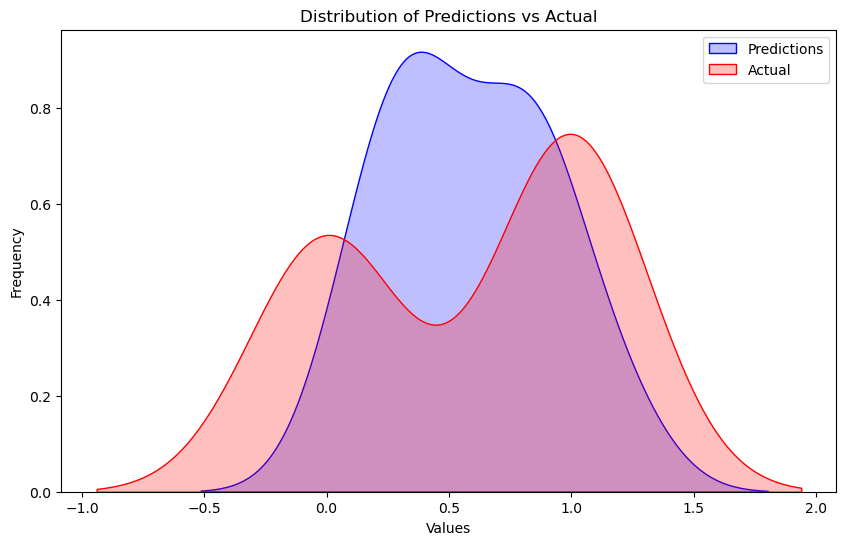

In [324]:
model = LinearRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
# Plot the distribution of predicted and actual values using Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(predictions, color="blue", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)

# Set labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions vs Actual")
plt.legend()

# Show the plot
plt.show()

In [325]:
data['y'] = data['y'].cat.codes
data['x4'] = data['x4'].cat.codes

Точность модели: 0.75
Матрица ошибок:
[[4 1]
 [2 5]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.83      0.71      0.77         7

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



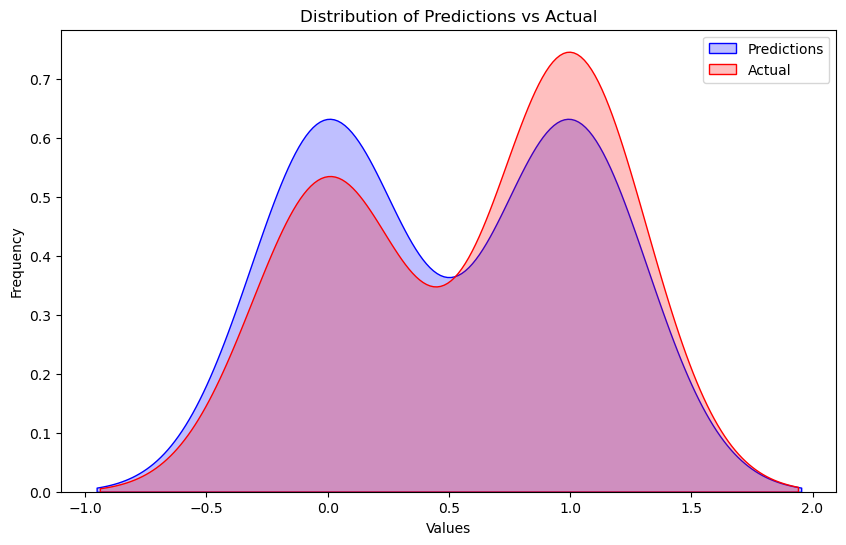

In [326]:
#3
# Разделяем данные на X и y
X = data.drop(columns='y')
X = sm.add_constant(X)  # Добавляем константу
y = data['y']

# Разделяем данные на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель логистической регрессии на тренировочных данных
model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

# Предсказания на тестовых данных
y_pred = model.predict(X_test)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]  # Преобразуем вероятности в бинарные классы

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

# Вывод результатов
print(f"Точность модели: {accuracy}")
print("Матрица ошибок:")
print(conf_matrix)
print("Отчет по классификации:")
print(class_report)

plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_binary, color="blue", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)

# Set labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions vs Actual")
plt.legend()

# Show the plot
plt.show()

# 4
# Бинарная логистическая регрессия

## Уравнение логистической регрессии

Общая форма уравнения для бинарной логистической регрессии:

$$
\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

Где:
- $p$ — вероятность принадлежности к классу 1.
- $\beta_0$ — свободный член (intercept).
- $\beta_1, \beta_2, \dots, \beta_n$ — коэффициенты регрессии для соответствующих признаков $X_1, X_2, \dots, X_n$.
- $X_1, X_2, \dots, X_n$ — значения предикторов (признаков).

In [327]:
coeff = model.params
print("Коэффициенты модели:")
for variable, coef in coeff.items():
    print(f"{variable}: {coef:.6f}")

Коэффициенты модели:
const: -10.385194
x1: 0.550837
x2: 0.300564
x3: 0.182532
x4: 0.205172
x5: -0.051326


$$
\text{logit}(p) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5
$$
- $\beta_0$ = -10.385194  (свободный член)
- $\beta_1$ = 0.550837  (коэффициент для  X_1 )
- $\beta_2$ = 0.300564  (коэффициент для  X_2 )
- $\beta_3$ = 0.182532  (коэффициент для  X_3 )
- $\beta_4$ = 0.205172  (коэффициент для  X_4 )
- $\beta_5$ = -0.051326  (коэффициент для  X_5 )
$$
\text{logit}(p) = -10.385194 + 0.550837 \cdot X_1 + 0.300564 \cdot X_2 + 0.182532 \cdot X_3 + 0.205172 \cdot X_4 - 0.051326 \cdot X_5
$$

In [328]:
#5
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:                            GLM   Df Residuals:                       40
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.349
Date:                Mon, 21 Oct 2024   Deviance:                       28.698
Time:                        11:49:42   Pearson chi2:                     47.4
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4874
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3852      4.711     -2.204      0.028     -19.619      -1.151
x1             0.5508      0.231      2.382      0.017       0.098       1.004
x2             0.3006      0.682      0.440      0.660      -1.037       1.638
x3             0.1825      0.668      0.273      0.785      -1.127       1.492
x4             0.2052      0.576      0.356      0.722      -0.924       1.335
x5            -0.0513      0.031     -1.631      0.103      -0.113       0.010
==============================================================================
"""

In [329]:
def stepwise_selection_with_aic(X, y, initial_features):
    included = list(initial_features)
    best_aic = float('inf')

    while True:
        changed = False

        # Оценка текущей модели
        X_with_const = sm.add_constant(X[included])
        model = sm.OLS(y, X_with_const).fit()
        current_aic = model.aic

        # Проверка на выход
        for feature in included:
            X_temp = X_with_const.drop(columns=feature)
            model_temp = sm.OLS(y, X_temp).fit()
            if model_temp.aic < current_aic:
                included.remove(feature)
                current_aic = model_temp.aic
                changed = True
                print(f"Removed {feature} with AIC {model_temp.aic:.4f}")
                break

        # Проверка на вход
        for feature in X.columns:
            if feature not in included:
                X_temp = X_with_const.copy()
                X_temp[feature] = X[feature]
                model_temp = sm.OLS(y, X_temp).fit()
                if model_temp.aic < current_aic:
                    included.append(feature)
                    changed = True
                    print(f"Added {feature} with AIC {model_temp.aic:.4f}")
                    break

        if not changed:
            break

    return included

In [330]:
# Initializing initial features (all features)
initial_features = X_train.columns.tolist()
selected_features = stepwise_selection_with_aic(X_train, y_train, initial_features)
X_train_clear = sm.add_constant(X_train[selected_features])
X_test_clear = sm.add_constant(X_test[selected_features])

Removed x2 with AIC 41.4305
Removed x4 with AIC 39.5081


In [331]:

# Обучаем модель логистической регрессии на тренировочных данных
model = sm.GLM(y_train, X_train_clear, family=sm.families.Binomial()).fit()

In [332]:
#6
# Log-likelihood of the full model
ll_full = model.llf

# Fit a null model (intercept only)
null_model = sm.GLM(y_train, np.ones_like(y_train), family=sm.families.Binomial()).fit()
ll_null = null_model.llf

# Likelihood Ratio Test statistic
likelihood_ratio_statistic = -2 * (ll_null - ll_full)

# Degrees of freedom (number of predictors)
degrees_of_freedom = len(model.params) - 1  # Subtracting one for the intercept

# Calculate p-value from chi-squared distribution
p_value = chi2.sf(likelihood_ratio_statistic, degrees_of_freedom)

# Displaying the results
print("Likelihood Ratio Test Statistic:", likelihood_ratio_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)

if p_value > 0.05:
    conclusion = (
        f"Результаты теста отношения правдоподобия:\n"
        f"-------------------------------\n"
        f"Статистика теста отношения правдоподобия: {likelihood_ratio_statistic:.2f}\n"
        f"Степени свободы: {degrees_of_freedom}\n"
        f"P-значение: {p_value:.2e}\n\n"
        "Заключение:\n"
        "Поскольку p-значение больше общего уровня значимости 0.05, мы не можем отвергнуть нулевую гипотезу.\n "
        "Это указывает на то, что недостаточно доказательств для заключения о том,\n"
        "что какие-либо из предикторов в модели значительно связаны с зависимой переменной."
    )
else:
    conclusion = (
        f"Результаты теста отношения правдоподобия:\n"
        f"-------------------------------\n"
        f"Статистика теста отношения правдоподобия: {likelihood_ratio_statistic:.2f}\n"
        f"Степени свободы: {degrees_of_freedom}\n"
        f"P-значение: {p_value:.2e}\n\n"
        "Заключение:\n"
        "Поскольку p-значение значительно меньше общего уровня значимости 0.05, мы отвергаем нулевую гипотезу.\n "
        "Это указывает на то, что хотя бы один из предикторов в модели значимо связан с зависимой переменной,\n "
        "что свидетельствует о том, что модель обеспечивает значительно лучшее соответствие данным по сравнению с моделью без предикторов."
    )

print(conclusion)

Likelihood Ratio Test Statistic: 30.31962820290524
Degrees of Freedom: 3
P-value: 1.1820958677978299e-06
Результаты теста отношения правдоподобия:
-------------------------------
Статистика теста отношения правдоподобия: 30.32
Степени свободы: 3
P-значение: 1.18e-06

Заключение:
Поскольку p-значение значительно меньше общего уровня значимости 0.05, мы отвергаем нулевую гипотезу.
 Это указывает на то, что хотя бы один из предикторов в модели значимо связан с зависимой переменной,
 что свидетельствует о том, что модель обеспечивает значительно лучшее соответствие данным по сравнению с моделью без предикторов.


In [333]:
#7                                                                                           c
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:                            GLM   Df Residuals:                       42
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.560
Date:                Mon, 21 Oct 2024   Deviance:                       29.121
Time:                        11:49:42   Pearson chi2:                     43.7
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4827
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6698      3.463     -2.503      0.012     -15.458      -1.882
x1             0.5197      0.217      2.390      0.017       0.094       0.946
x3             0.4767      0.183      2.603      0.009       0.118       0.836
x5            -0.0521      0.030     -1.740      0.082      -0.111       0.007
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.318590
         Iterations 8
Модель: Logit Model
Точность модели: 0.5833333333333334
Матрица ошибок:
[[3 2]
 [3 4]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



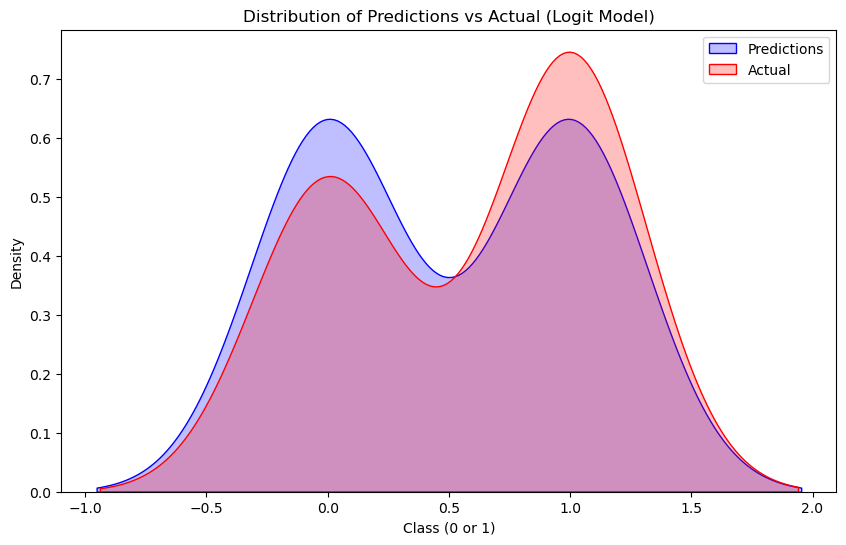

Модель: Probit Model
Точность модели: 0.5833333333333334
Матрица ошибок:
[[3 2]
 [3 4]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



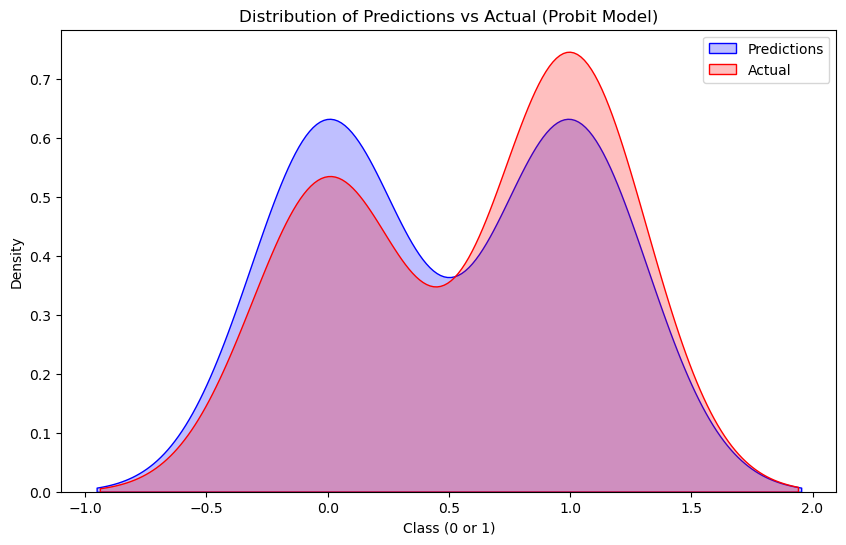

In [334]:
#8
# Оценка точности и отчетов для моделей
def evaluate_model(y_test, y_pred_binary, model_name):
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    class_report = classification_report(y_test, y_pred_binary)
    
    # Вывод результатов
    print(f"Модель: {model_name}")
    print(f"Точность модели: {accuracy}")
    print("Матрица ошибок:")
    print(conf_matrix)
    print("Отчет по классификации:")
    print(class_report)
    
    # Визуализация распределения предсказаний и фактических значений
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_pred_binary, color="blue", label="Predictions", fill=True)
    sns.kdeplot(y_test, color="red", label="Actual", fill=True)
    
    plt.xlabel("Class (0 or 1)")
    plt.ylabel("Density")
    plt.title(f"Distribution of Predictions vs Actual ({model_name})")
    plt.legend()
    plt.show()

# Логит-модель
logit_model = sm.GLM(y_train, X_train_clear, family=sm.families.Binomial()).fit()
y_pred_logit = logit_model.predict(X_test_clear)
y_pred_logit_binary = [1 if x > 0.5 else 0 for x in y_pred_logit]

# Пробит-модель
probit_model = sm.Probit(y_train, X_train_clear).fit()
y_pred_probit = probit_model.predict(X_test_clear)
y_pred_probit_binary = [1 if x > 0.5 else 0 for x in y_pred_probit]

# Оценка и визуализация логит-модели
evaluate_model(y_test, y_pred_logit_binary, "Logit Model")

# Оценка и визуализация пробит-модели
evaluate_model(y_test, y_pred_probit_binary, "Probit Model")

# Ответы получились одинаковые
### Может быть связанно с отсутствием выбросов

Optimization terminated successfully.
         Current function value: 0.318590
         Iterations 8
Модель: Logit Model
Точность модели: 0.5833333333333334
Матрица ошибок:
[[3 2]
 [3 4]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



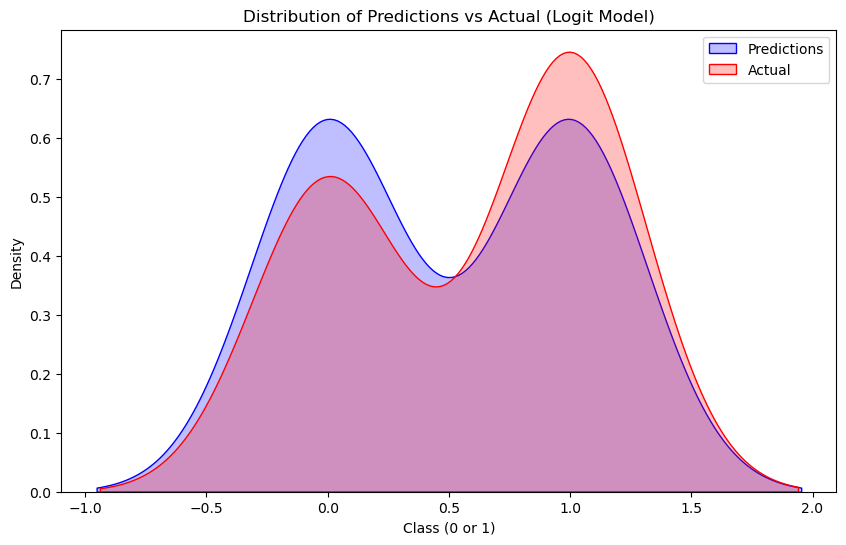

Модель: Probit Model
Точность модели: 0.6666666666666666
Матрица ошибок:
[[4 1]
 [3 4]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12



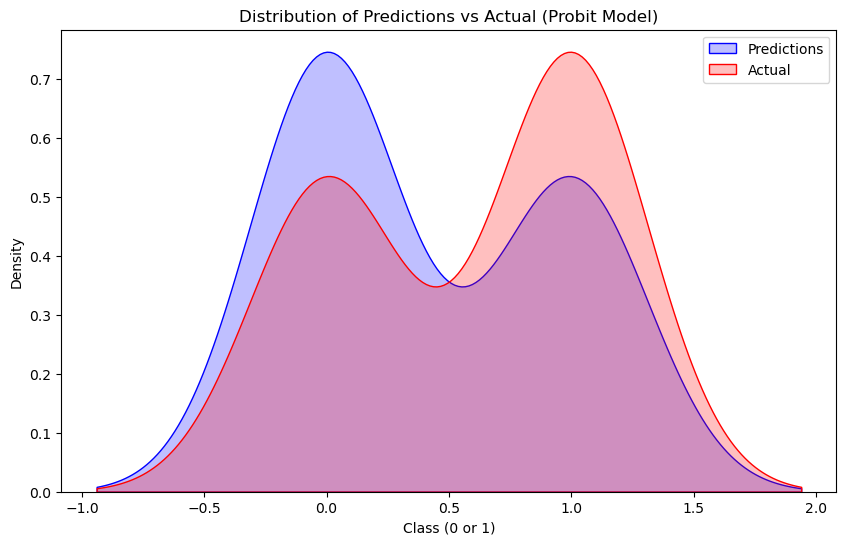

In [335]:
# Оценка точности и отчетов для моделей
def evaluate_model(y_test, y_pred_binary, model_name):
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    class_report = classification_report(y_test, y_pred_binary)
    
    # Вывод результатов
    print(f"Модель: {model_name}")
    print(f"Точность модели: {accuracy}")
    print("Матрица ошибок:")
    print(conf_matrix)
    print("Отчет по классификации:")
    print(class_report)
    
    # Визуализация распределения предсказаний и фактических значений
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_pred_binary, color="blue", label="Predictions", fill=True)
    sns.kdeplot(y_test, color="red", label="Actual", fill=True)
    
    plt.xlabel("Class (0 or 1)")
    plt.ylabel("Density")
    plt.title(f"Distribution of Predictions vs Actual ({model_name})")
    plt.legend()
    plt.show()

# Логит-модель
logit_model = sm.GLM(y_train, X_train_clear, family=sm.families.Binomial()).fit()
y_pred_logit = logit_model.predict(X_test_clear)
y_pred_logit_binary = [1 if x > 0.6 else 0 for x in y_pred_logit]

# Пробит-модель
probit_model = sm.Probit(y_train, X_train_clear).fit()
y_pred_probit = probit_model.predict(X_test_clear)
y_pred_probit_binary = [1 if x > 0.6 else 0 for x in y_pred_probit]

# Оценка и визуализация логит-модели
evaluate_model(y_test, y_pred_logit_binary, "Logit Model")

# Оценка и визуализация пробит-модели
evaluate_model(y_test, y_pred_probit_binary, "Probit Model")

In [336]:
# При изменении порога вероятности на 0.6 для пробит-модели, мы получили более низкие показатели точности

In [337]:
#9
# 2. Преобразование вероятностей в бинарные классы с порогом 0.5
y_pred_logit_binary = [1 if x > 0.5 else 0 for x in y_pred_logit]
y_pred_probit_binary = [1 if x > 0.5 else 0 for x in y_pred_probit]

# 3. Построение таблицы сопряженности для логит-модели
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit_binary)
conf_matrix_logit_df = pd.DataFrame(conf_matrix_logit, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("Таблица сопряженности для логит-модели:")
print(conf_matrix_logit_df)

# 4. Построение таблицы сопряженности для пробит-модели
conf_matrix_probit = confusion_matrix(y_test, y_pred_probit_binary)
conf_matrix_probit_df = pd.DataFrame(conf_matrix_probit, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("\nТаблица сопряженности для пробит-модели:")
print(conf_matrix_probit_df)

Таблица сопряженности для логит-модели:
          Predicted 0  Predicted 1
Actual 0            3            2
Actual 1            3            4

Таблица сопряженности для пробит-модели:
          Predicted 0  Predicted 1
Actual 0            3            2
Actual 1            3            4


### Эти таблицы показывают количество истинно положительных, истинно отрицательных, ложно положительных и ложно отрицательных предсказаний для каждой модели.

In [338]:
#10
# Функция для вычисления чувствительности (Sensitivity)
def sensitivity(y_true, y_pred_binary):
    cm = confusion_matrix(y_true, y_pred_binary)
    TP = cm[1, 1]
    FN = cm[1, 0]
    return TP / (TP + FN)

# Функция для вычисления специфичности (Specificity)
def specificity(y_true, y_pred_binary):
    cm = confusion_matrix(y_true, y_pred_binary)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Чувствительность и специфичность для логит-модели
sensitivity_logit = sensitivity(y_test, y_pred_logit_binary)
specificity_logit = specificity(y_test, y_pred_logit_binary)

# Чувствительность и специфичность для пробит-модели
sensitivity_probit = sensitivity(y_test, y_pred_probit_binary)
specificity_probit = specificity(y_test, y_pred_probit_binary)

# Вывод результатов
print(f"Логит-модель: Чувствительность = {sensitivity_logit:.2f}, Специфичность = {specificity_logit:.2f}")
print(f"Пробит-модель: Чувствительность = {sensitivity_probit:.2f}, Специфичность = {specificity_probit:.2f}")

Логит-модель: Чувствительность = 0.57, Специфичность = 0.60
Пробит-модель: Чувствительность = 0.57, Специфичность = 0.60


- **Чувствительность (Sensitivity, также называется Recall или True Positive Rate, TPR)** — это доля правильно предсказанных положительных классов:

$$
\text{Sensitivity} = \frac{TP}{TP + FN}
$$

где:
- $TP$ (True Positives) — истинно положительные предсказания,
- $FN$ (False Negatives) — ложно отрицательные предсказания.

- **Специфичность (Specificity, также называется True Negative Rate, TNR)** — это доля правильно предсказанных отрицательных классов:

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

где:
- $TN$ (True Negatives) — истинно отрицательные предсказания,
- $FP$ (False Positives) — ложно положительные предсказания.

### Эти метрики дают представление о том, насколько хорошо модель справляется с правильной классификацией положительных и отрицательных классов.

### В медицине важную роль играет высокая чувствительность

In [339]:
#11
def optimalCutoff(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    optimal_idx = np.argmax(tpr - fpr)  # Выбираем порог, максимизирующий (TPR - FPR)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]

def optimalCutoff_high_sensitivity(y_true, y_scores, target_sensitivity=0.90):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    # Ищем первый порог, при котором чувствительность >= target_sensitivity
    for i in range(len(tpr)):
        if tpr[i] >= target_sensitivity:
            return thresholds[i], fpr[i], tpr[i]  # Порог, FPR, TPR
    return None, None, None  # Если не найдено

# 1. Предсказать вероятности для тестовых данных
y_pred_logit_scores = logit_model.predict(X_test_clear)
y_pred_probit_scores = probit_model.predict(X_test_clear)

# 2. Найти оптимальный порог для логит-модели
optimal_threshold_logit, fpr_logit, tpr_logit = optimalCutoff_high_sensitivity(y_test, y_pred_logit_scores)
print(f"Оптимальный порог для логит-модели: {optimal_threshold_logit:.2f}")

# 3. Найти оптимальный порог для пробит-модели
optimal_threshold_probit, fpr_probit, tpr_probit = optimalCutoff_high_sensitivity(y_test, y_pred_probit_scores)
print(f"Оптимальный порог для пробит-модели: {optimal_threshold_probit:.2f}")

# 4. Построить таблицу сопряженности для логит-модели
y_pred_logit_optimal = [1 if x > optimal_threshold_logit else 0 for x in y_pred_logit_scores]
conf_matrix_logit_optimal = confusion_matrix(y_test, y_pred_logit_optimal)
conf_matrix_logit_optimal_df = pd.DataFrame(conf_matrix_logit_optimal, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("Таблица сопряженности для логит-модели (оптимальный порог):")
print(conf_matrix_logit_optimal_df)

# 5. Построить таблицу сопряженности для пробит-модели
y_pred_probit_optimal = [1 if x > optimal_threshold_probit else 0 for x in y_pred_probit_scores]
conf_matrix_probit_optimal = confusion_matrix(y_test, y_pred_probit_optimal)
conf_matrix_probit_optimal_df = pd.DataFrame(conf_matrix_probit_optimal, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("\nТаблица сопряженности для пробит-модели (оптимальный порог):")
print(conf_matrix_probit_optimal_df)

# 6. Вычислить чувствительность и специфичность для логит-модели
def sensitivity_and_specificity(conf_matrix):
    TN = conf_matrix[0, 0]
    TP = conf_matrix[1, 1]
    FN = conf_matrix[1, 0]
    FP = conf_matrix[0, 1]
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    return sensitivity, specificity

sensitivity_logit_optimal, specificity_logit_optimal = sensitivity_and_specificity(conf_matrix_logit_optimal)
print(f"\nЛогит-модель: Чувствительность = {sensitivity_logit_optimal:.2f}, Специфичность = {specificity_logit_optimal:.2f}")

sensitivity_probit_optimal, specificity_probit_optimal = sensitivity_and_specificity(conf_matrix_probit_optimal)
print(f"Пробит-модель: Чувствительность = {sensitivity_probit_optimal:.2f}, Специфичность = {specificity_probit_optimal:.2f}")

Оптимальный порог для логит-модели: 0.06
Оптимальный порог для пробит-модели: 0.06
Таблица сопряженности для логит-модели (оптимальный порог):
          Predicted 0  Predicted 1
Actual 0            2            3
Actual 1            1            6

Таблица сопряженности для пробит-модели (оптимальный порог):
          Predicted 0  Predicted 1
Actual 0            2            3
Actual 1            1            6

Логит-модель: Чувствительность = 0.86, Специфичность = 0.40
Пробит-модель: Чувствительность = 0.86, Специфичность = 0.40


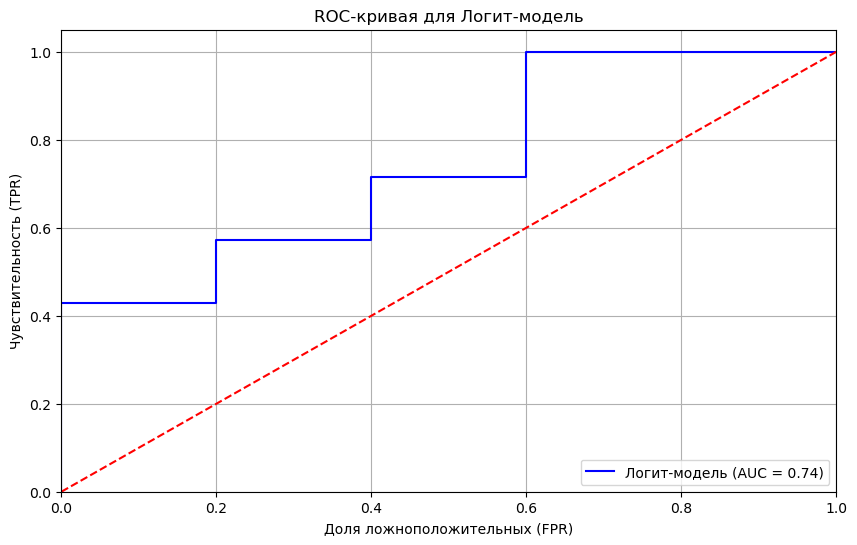

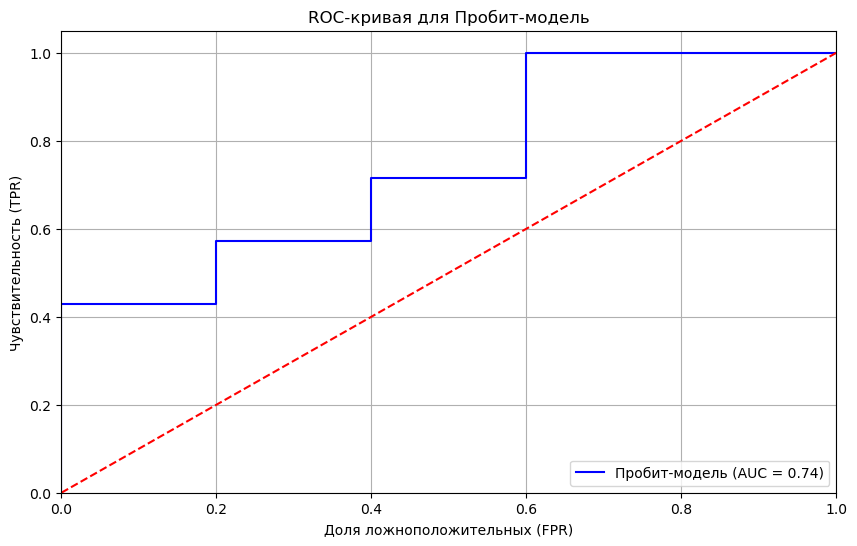

In [340]:
#13
def plotROC(y_true, y_scores, model_name):
    # Вычисление ROC-кривой
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Построение ROC-кривой
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного классификатора
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Доля ложноположительных (FPR)')
    plt.ylabel('Чувствительность (TPR)')
    plt.title(f'ROC-кривая для {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Построение ROC-кривой для логит-модели
plotROC(y_test, y_pred_logit_scores, 'Логит-модель')

# Построение ROC-кривой для пробит-модели
plotROC(y_test, y_pred_probit_scores, 'Пробит-модель')

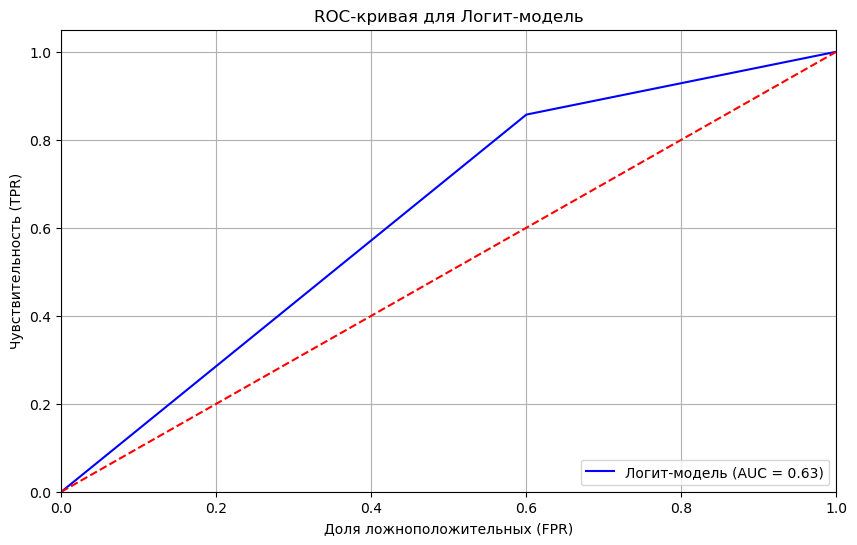

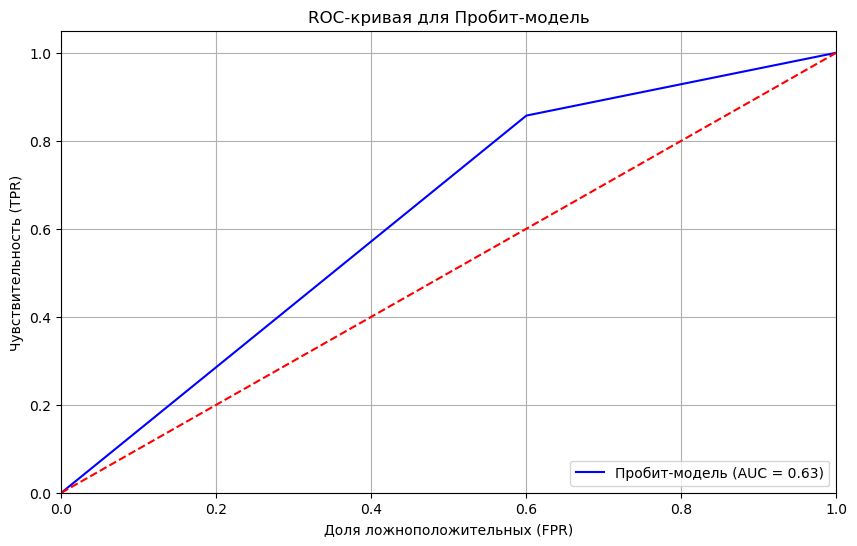

In [341]:
def plotROC(y_true, y_scores, model_name):
    # Вычисление ROC-кривой
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Построение ROC-кривой
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного классификатора
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Доля ложноположительных (FPR)')
    plt.ylabel('Чувствительность (TPR)')
    plt.title(f'ROC-кривая для {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Построение ROC-кривой для логит-модели
plotROC(y_test, y_pred_logit_optimal, 'Логит-модель')

# Построение ROC-кривой для пробит-модели
plotROC(y_test, y_pred_probit_optimal, 'Пробит-модель')

### 14 уже сделан ранее, так как были признаки которые имели тест вальда более 0.05 а значит были признаки которые не сильно влияли на общую выборку